In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [6]:
df.dtypes

cgpa    float64
iq        int64
dtype: object

In [7]:
df.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [8]:
df['cgpa'].unique()

array([5.13, 5.9 , 8.36, 8.27, 5.45, 5.88, 8.41, 8.8 , 5.79, 8.09, 4.6 ,
       6.1 , 8.16, 5.  , 5.71, 8.31, 5.5 , 7.87, 6.05, 5.84, 7.47, 4.86,
       7.78, 4.78, 4.96, 7.93, 9.18, 8.04, 5.43, 8.86, 6.01, 8.83, 5.32,
       7.77, 8.  , 8.56, 5.91, 5.44, 5.57, 5.34, 8.43, 8.02, 5.31, 8.96,
       8.78, 8.14, 6.4 , 8.45, 5.67, 5.14, 4.95, 8.79, 8.12, 8.81, 5.85,
       8.88, 5.87, 9.07, 6.02, 8.34, 8.65, 8.92, 5.21, 8.75, 8.53, 4.91,
       5.77, 8.29, 6.06, 8.71, 5.28, 5.55, 5.81, 9.3 , 5.15, 8.72, 9.01,
       5.47, 4.9 , 8.97, 4.89, 9.  , 5.74, 8.76, 5.8 , 9.23, 8.2 , 5.05,
       8.67, 8.18, 9.03, 8.61, 4.98, 9.13, 5.01, 8.91, 4.85, 7.99, 4.76,
       8.98, 8.08, 8.26, 8.89, 8.25, 5.69, 8.4 , 7.84, 5.2 , 8.3 , 6.14,
       4.77, 8.93, 5.94, 4.68, 7.9 , 7.97, 8.21, 4.81, 5.86, 5.03, 8.58,
       8.94, 6.38, 8.6 , 8.77, 4.88, 8.23, 6.61, 8.54, 6.04, 8.35, 6.24,
       8.33, 4.67, 4.97, 8.68, 9.06, 8.9 , 4.87, 8.46, 4.99, 5.97, 6.17,
       7.89, 4.79, 7.91, 8.95, 6.33, 8.44, 8.57, 6.

In [9]:
df['iq'].unique()

array([ 88, 113,  93,  97, 110, 109,  98, 115,  94,  86, 108,  95, 111,
        91,  92,  87, 119, 106, 117, 112, 118,  96,  84,  85, 116,  83,
       104, 121, 114,  89,  90, 100, 107, 120])

In [22]:
df.iloc[:,:].corr()

,cgpa,iq
cgpa,1.000000,0.535301
iq,0.535301,1.000000


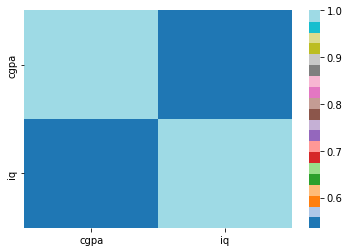

In [23]:
sns.heatmap(df.iloc[:,:].corr(),cmap="tab20")

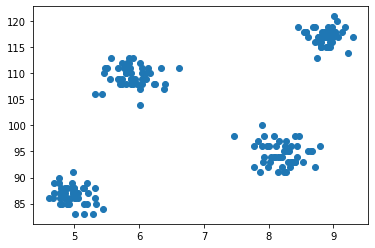

In [10]:
plt.scatter(df['cgpa'],df['iq'])

In [11]:
import plotly.graph_objs as go

In [13]:
x = df['cgpa']
y0 = df['iq']
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='iq'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="CGPA vs IQ",
                  xaxis_title="CGPA",
                  yaxis_title="IQ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

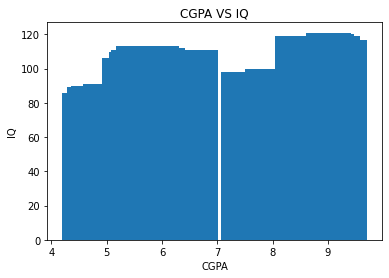

In [14]:
plt.bar(df['cgpa'],df['iq'])
plt.title('CGPA VS IQ')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
model=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    model.append(km.inertia_)

In [17]:
model

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 398.4039118468833,
 295.43918959431915,
 233.54082485509014,
 208.38688951506788,
 173.07040109676714]

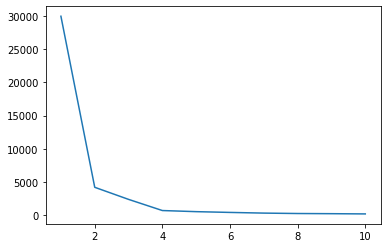

In [18]:
plt.plot(range(1,11),model)

In [19]:
X = df.iloc[:,:].values
km = KMeans(n_clusters =4)
y_means = km.fit_predict(X)

Text(0, 0.5, 'IQ')

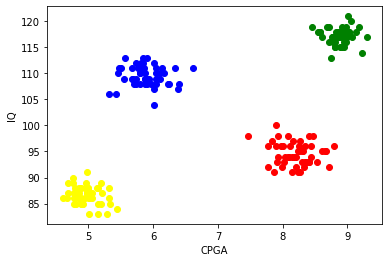

In [21]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='yellow')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='green')
plt.xlabel('CPGA')
plt.ylabel('IQ')